Compito 3.1 di Polizzi Lucrezia, matricola 4935449; Fatto in gruppo con Fazio Aurora.
Questa volta il compito era quello di implementare un codice per il problema dei generali bizantini, seguendo il protocollo Montecarlo, ripetendolo per 2^10 run.
Come richideva il compito ho calcolato inoltre la frazione dei run in cui l'accrodo è raggiunto in r round e l'ho graficato:


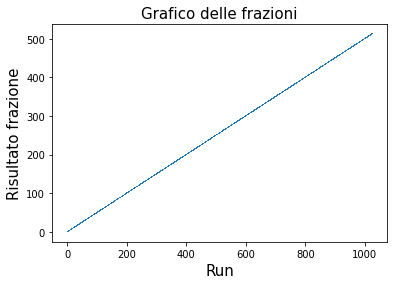

Il motivo per cui la frazione in cui l’accordo è raggiunto in 
r round è all’incirca R/2^r perché in base a come sono inizializzati i generali onesti allora si può raggiungere l'accordo in r round. 

In [ ]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np

def ProbMoneta(): 
  valore = randint(0,1)
  return valore

def bitB (b):           
  for i in range (0,3):    
    valore = randint(0,1) 
    b.append(valore)
  if b[0] == b[1] and b[1] == b[2]:
    b.clear()
    bitB(b)    
  return b 
 
def infingardo (inaffidabile,b): # assegno il valore inaffidabile al traditore
  for i in range(3):
    inaffidabile = 1 - b[i]
    b.append (inaffidabile)
    return b

def frazione (R,r):
  aux = pow(2,r)
  if aux is 0:
    return 0
  else:
    return R/aux

def frazioneRun(run, round):
  return run/round
    
def ByzGen (all, inaffidabile, b):  # problema dei Generali Bizantini
    moneta = ProbMoneta()           # calcolo la probabilità della moneta
    check = True 
    r = 0
    b = bitB(b) 
    while (check == True): #fino a quando non sono d'accordo li faccio "parlare"      
        r += 1
        all = infingardo (inaffidabile,b)
        if(b[0]==b[1] and b[1]==b[2]):
          check = False
        print (all)
        uno = all.count (1)       #calcolo maggioranza
        zero = all.count (0)
        if uno > zero:            #in base a chi vince assegno tally e maj
            maj = 1
            tally = uno
            print ("maj=", maj, "tally=", tally)
        else:
            maj = 0
            tally = zero
            print ("maj=", maj, "tally=", tally)
    
  
        if tally >= 3: # se tally è >= 3 allora ho raggiunto la maggioranza e posso fermare il loop
            valore = maj
            b.clear()
            for i in range (0,3):  
                b.append(valore)

        if moneta == 1: # se il primo if non è soddisfatto allora assegno il valore della moneta ai processi
            b.clear()
            for i in range (0,3):
                b.append(1)
        else:           #altrimenti pulisco l'array e assegno il valore 0 ai processi onesti
            b.clear()
            for i in range (0,3):
                b.append(0)

    return r,check


if __name__ == "__main__":
    R = pow(2,10)   # run
    b = []          # salvo i 3 processi affidabili
    listFr= []      # salvo tutti i valori delle varie frazioni
    all = []        # salvo tutti i processi: 3 affidabili + 1 inaffidabile
    med =[]         # salvo il numero di round per l'accordo ad ogni iterazione
    accordo=[]      # salvo tutt i R/2^r
    arrayR= []      # salvo i numeri da 0 a 1024 per il grafico

    for i in range(R):
      print("\nRun n°:", i,"\n")
      arrayR.append(i)
      inaffidabile = 0
      
      r,check = ByzGen(all, inaffidabile, b)    #r = numero round
      med.append(r)
      if check is False:
        fr = frazioneRun(i,r)
        listFr.append(fr)
        print ("\nLa frazione dei run in cui l’accordo è raggiunto in r round : ", listFr[i])

        acc = frazione(R,r)
        accordo.append(acc)
        print("Frazione in cui l’accordo è raggiunto in r round è all’incirca: ", accordo[i])

      print ("I round necessari per raggiungere l'accordo sono:", r)
      b.clear()
 
    #grafico della frazione
    fig, ax = plt.subplots(1, 1)
    ax.plot(arrayR,listFr, ',', ms=1)
    plt.ylabel("Risultato frazione", fontsize="15")
    plt.xlabel("Run", fontsize="15")
    plt.title("Grafico delle frazioni", fontsize="15")
    ax.vlines(listFr, 0, max(listFr), colors='w', lw=1, alpha=.5)
